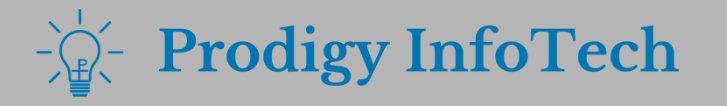

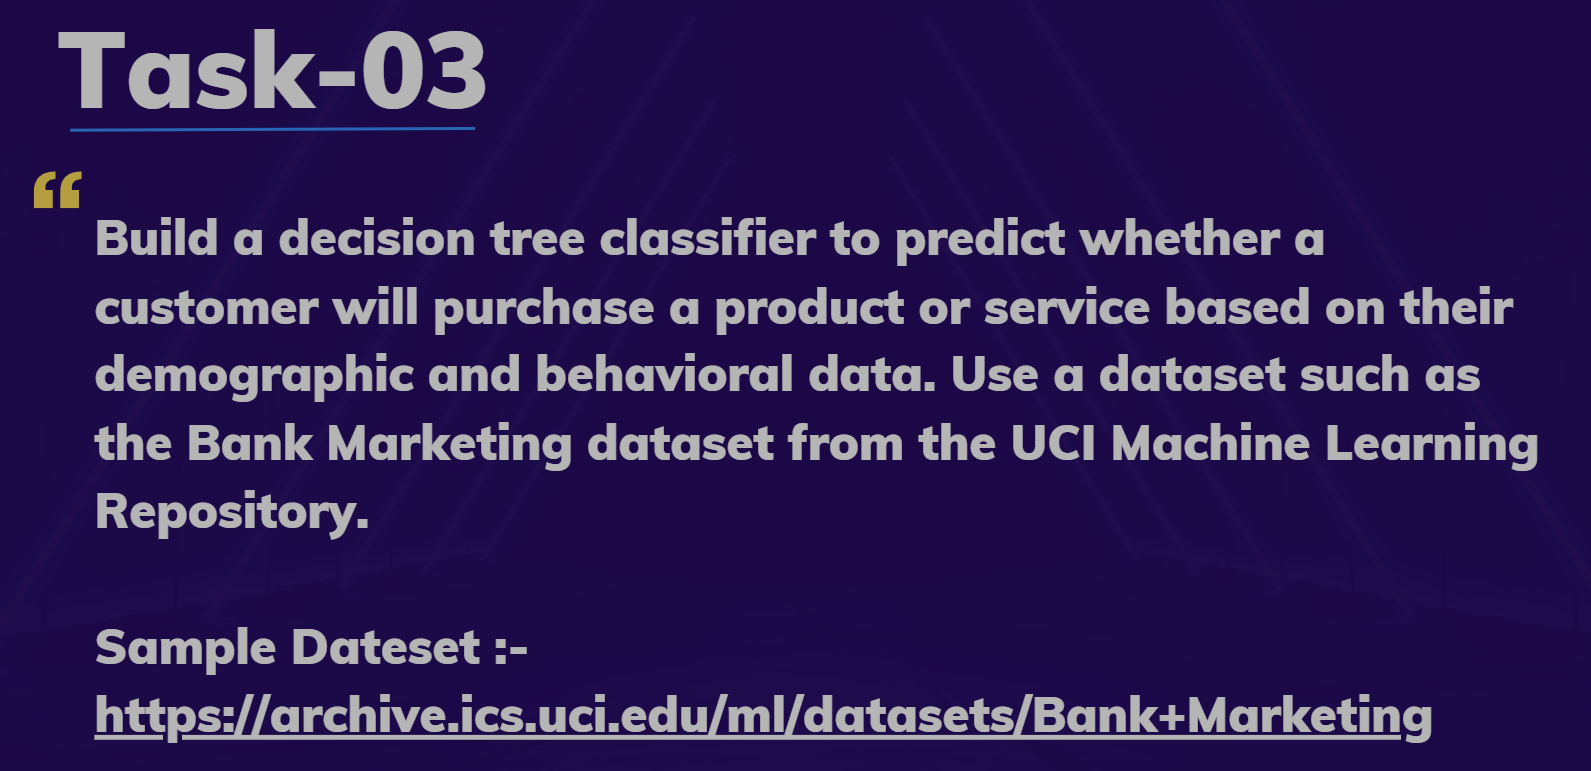

# About Dataset :
## Title: Bank Marketing(bank client data)
### ✔Relevant Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

The classification goal is to predict if the client will subscribe a term deposit (variable y).

### ✔Number of Instances: 41188 for bankdata.csv
### ✔Number of Attributes: 20 + target attribute.
### ✔Attribute information:
#### Input variables:
* age (numeric)
* job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
* marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
* education (categorical: "unknown","secondary","primary","tertiary")
* default: has credit in default? (binary: "yes","no")
* housing: has housing loan? (binary: "yes","no")
* loan: has personal loan? (binary: "yes","no")

#### 👉related with the last contact of the current campaign:
* contact: contact communication type (categorical: "unknown","telephone","cellular")
* day: last contact day of the month (numeric)
* month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
* duration: last contact duration, in seconds (numeric)
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
* emp.var.rate: employment variation rate - quarterly indicator (numeric)
* cons.price.idx: consumer price index - monthly indicator (numeric)
* cons.conf.idx: consumer confidence index - monthly indicator (numeric)
* euribor3m: euribor 3 month rate - daily indicator (numeric)
* nr.employed: number of employees - quarterly indicator (numeric)
#### 👉Output variable (desired target):
* y - has the client subscribed a term deposit? (binary: "yes","no")

# --------------------------------------------- Table of Content  ---------------------------------------
| No | Content |
|-----|--------|
| 1 | Introduction|
| 2 | Data Visualization |
| 3 | Feature Selection |
| 4 | Splitting data into train and test set |
| 5 | SMOTE(Synthetic minority oversampling technique)|
| 6 | Feature Scaling|
| 7 | Modelling |

# 1 | Introduction
##  | Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##  | Import dataset

In [2]:
data=pd.read_csv('bankdata.csv',delimiter=';')

##  | Data View

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## | Data Shape

In [4]:
rows_count, columns_count = data.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 41188
Total Number of columns : 21


## | Data Information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
data['y']=data['y'].map({'yes':1,'no':0})

In [7]:
data.pdays[data.pdays==-1]=0

C:\Users\Charu Gupta\AppData\Local\Temp\ipykernel_17964\2718108756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.pdays[data.pdays==-1]=0


## | Summary Statistics

In [8]:
data.describe().style.background_gradient()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.024060,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.421250,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


##  | Checking for unique values in all attributes
* Different numbers of distint values in each attribute

In [9]:
data.nunique().sort_values(ascending=True)

y                    2
contact              2
default              3
housing              3
loan                 3
poutcome             3
marital              4
day_of_week          5
education            8
previous             8
emp.var.rate        10
month               10
nr.employed         11
job                 12
cons.price.idx      26
cons.conf.idx       26
pdays               27
campaign            42
age                 78
euribor3m          316
duration          1544
dtype: int64

## | Checking for missing values in each column
* No such missing values in our dataset

In [10]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# 2 | Data Visualization
  ##   | Checking the data distribution of each Continuous variable
  ###   | Skewed Distribution-
* Left Skewed or Negatively Skewed:- A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions.(Mean<Median<Mode)
* Right Skewed or Positively Skewed:-A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions.(Mean>Median>Mode)
* Symmetric Distribution:-A symmetric distribution is a type of distribution where the left side of the distribution mirrors the right side(Mean=Median=Mode)

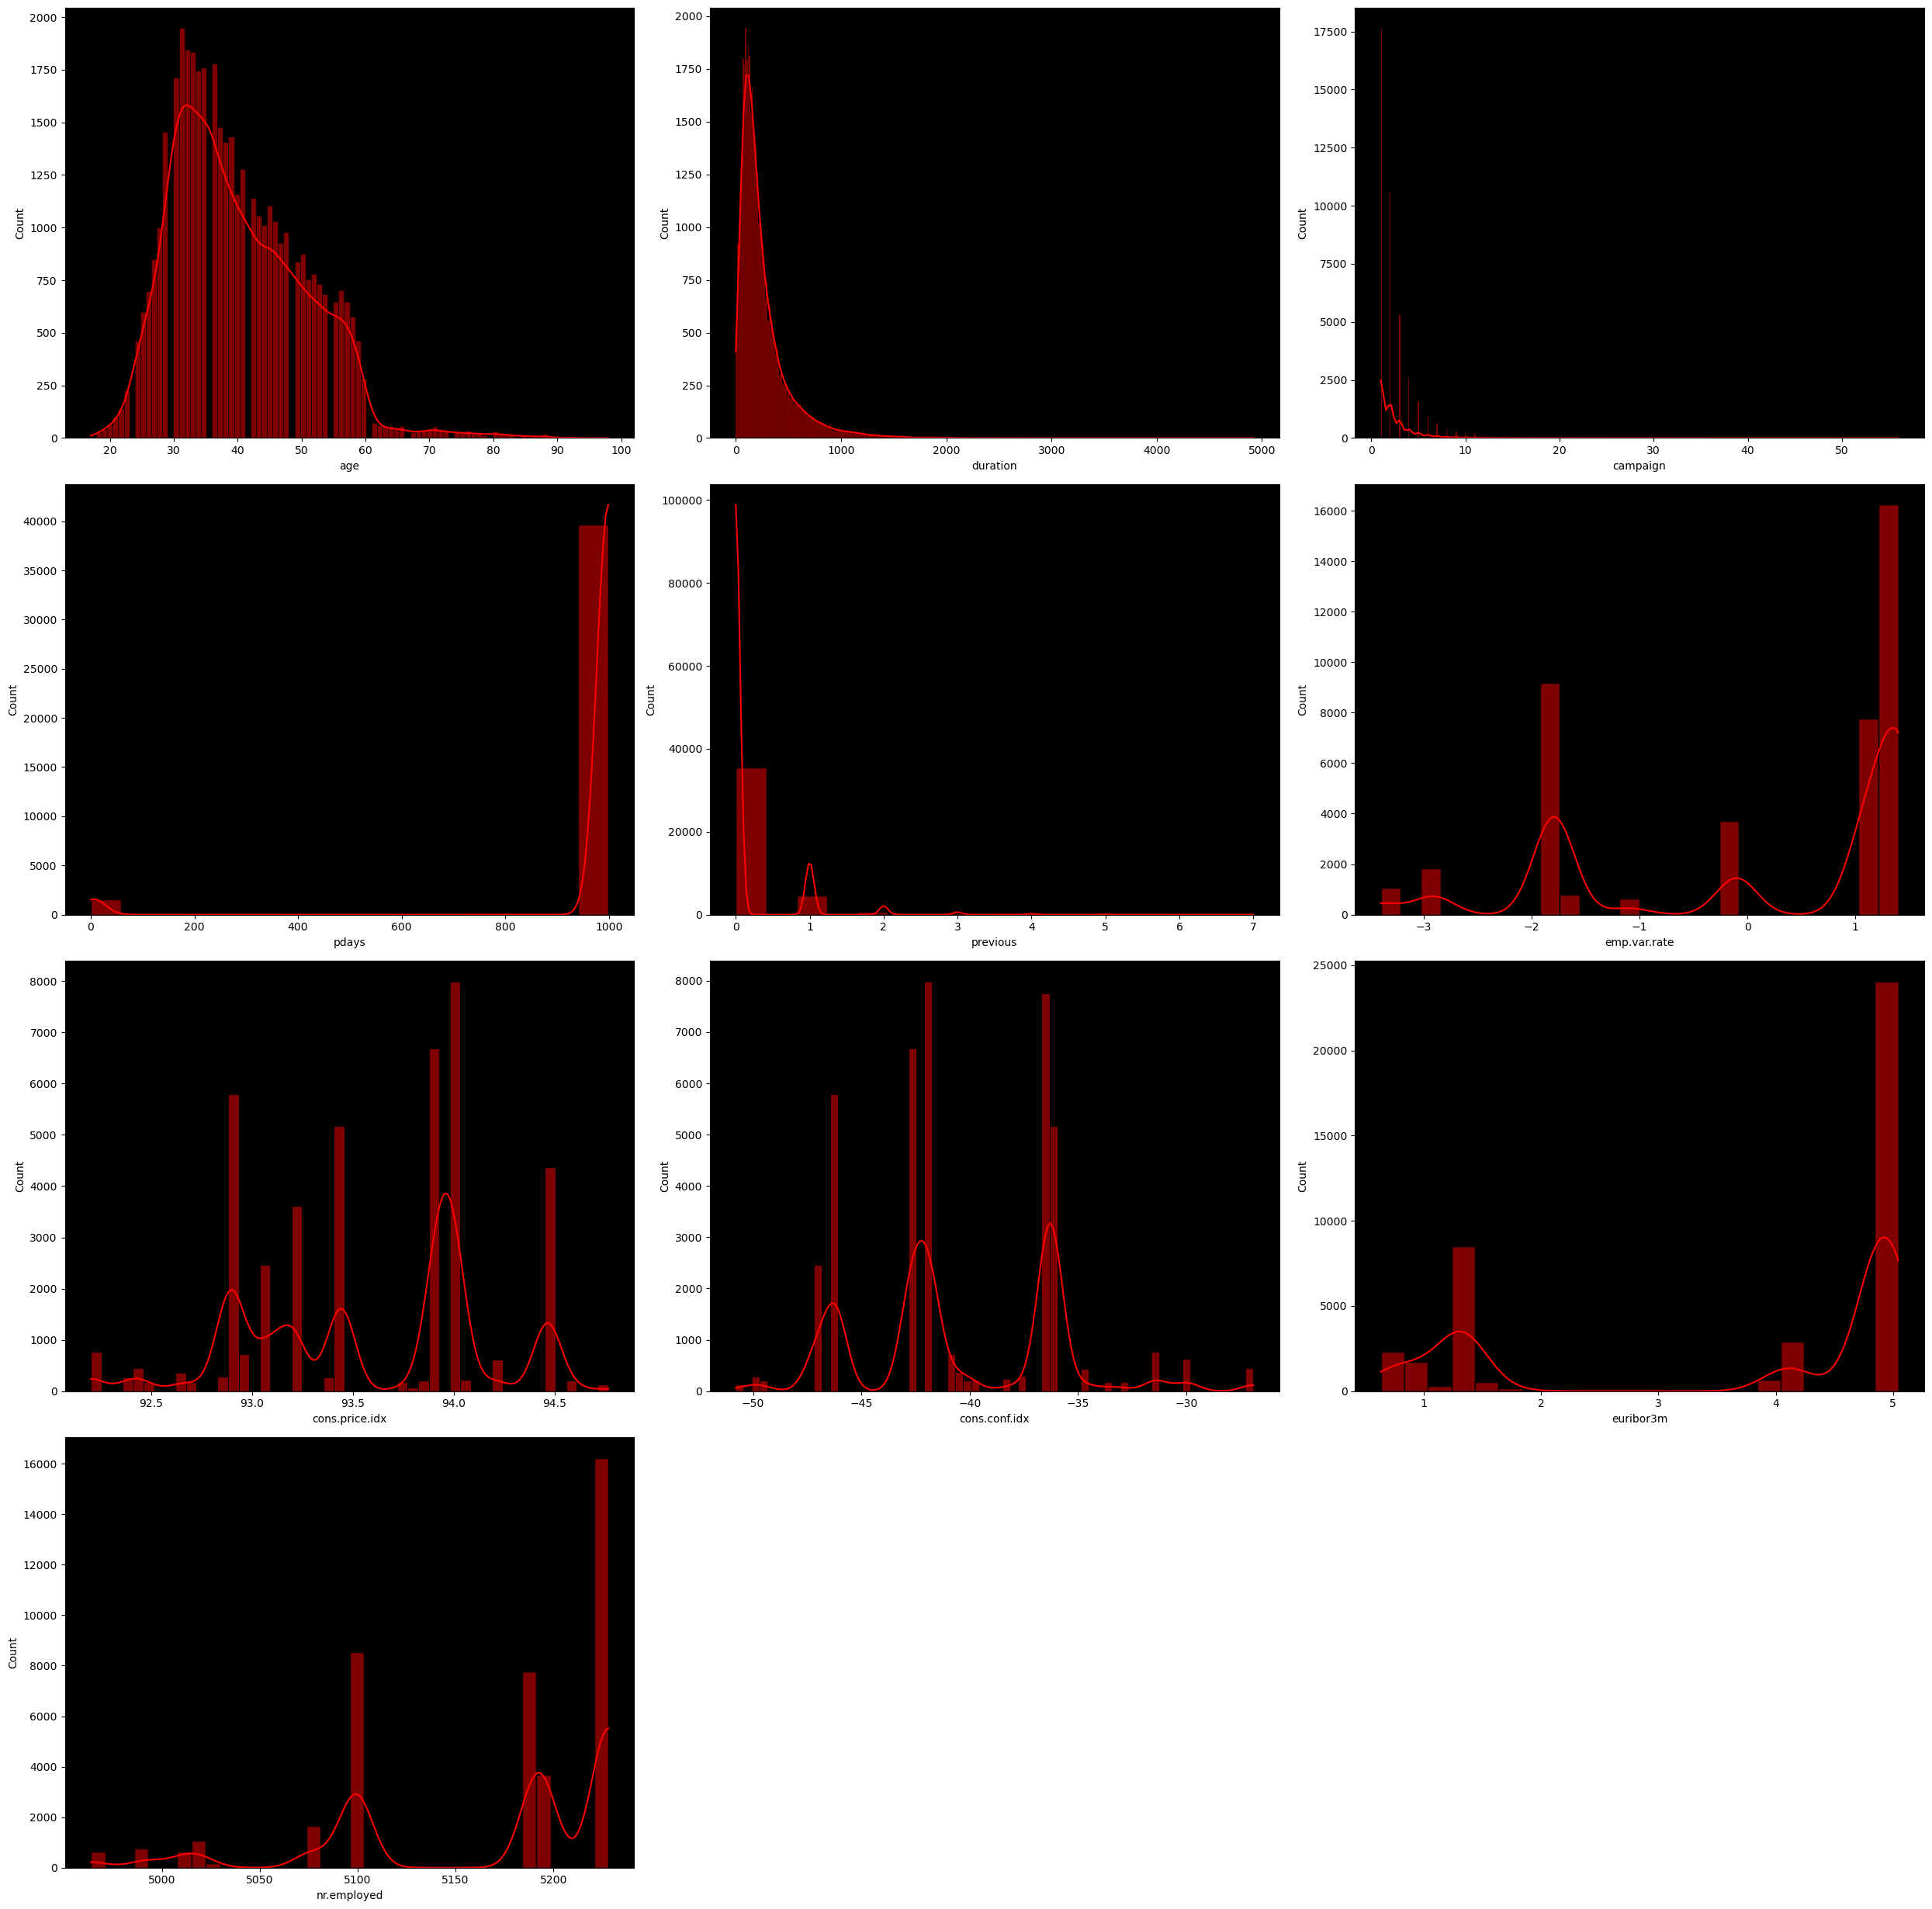

In [11]:
plt.figure(figsize=(25, 25))
for i, col in enumerate(data.drop(['y'],axis=1).select_dtypes(include=['int','float']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(4,3, i+1)
    sns.histplot(data=data, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

## | Box Plot
* It is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles.

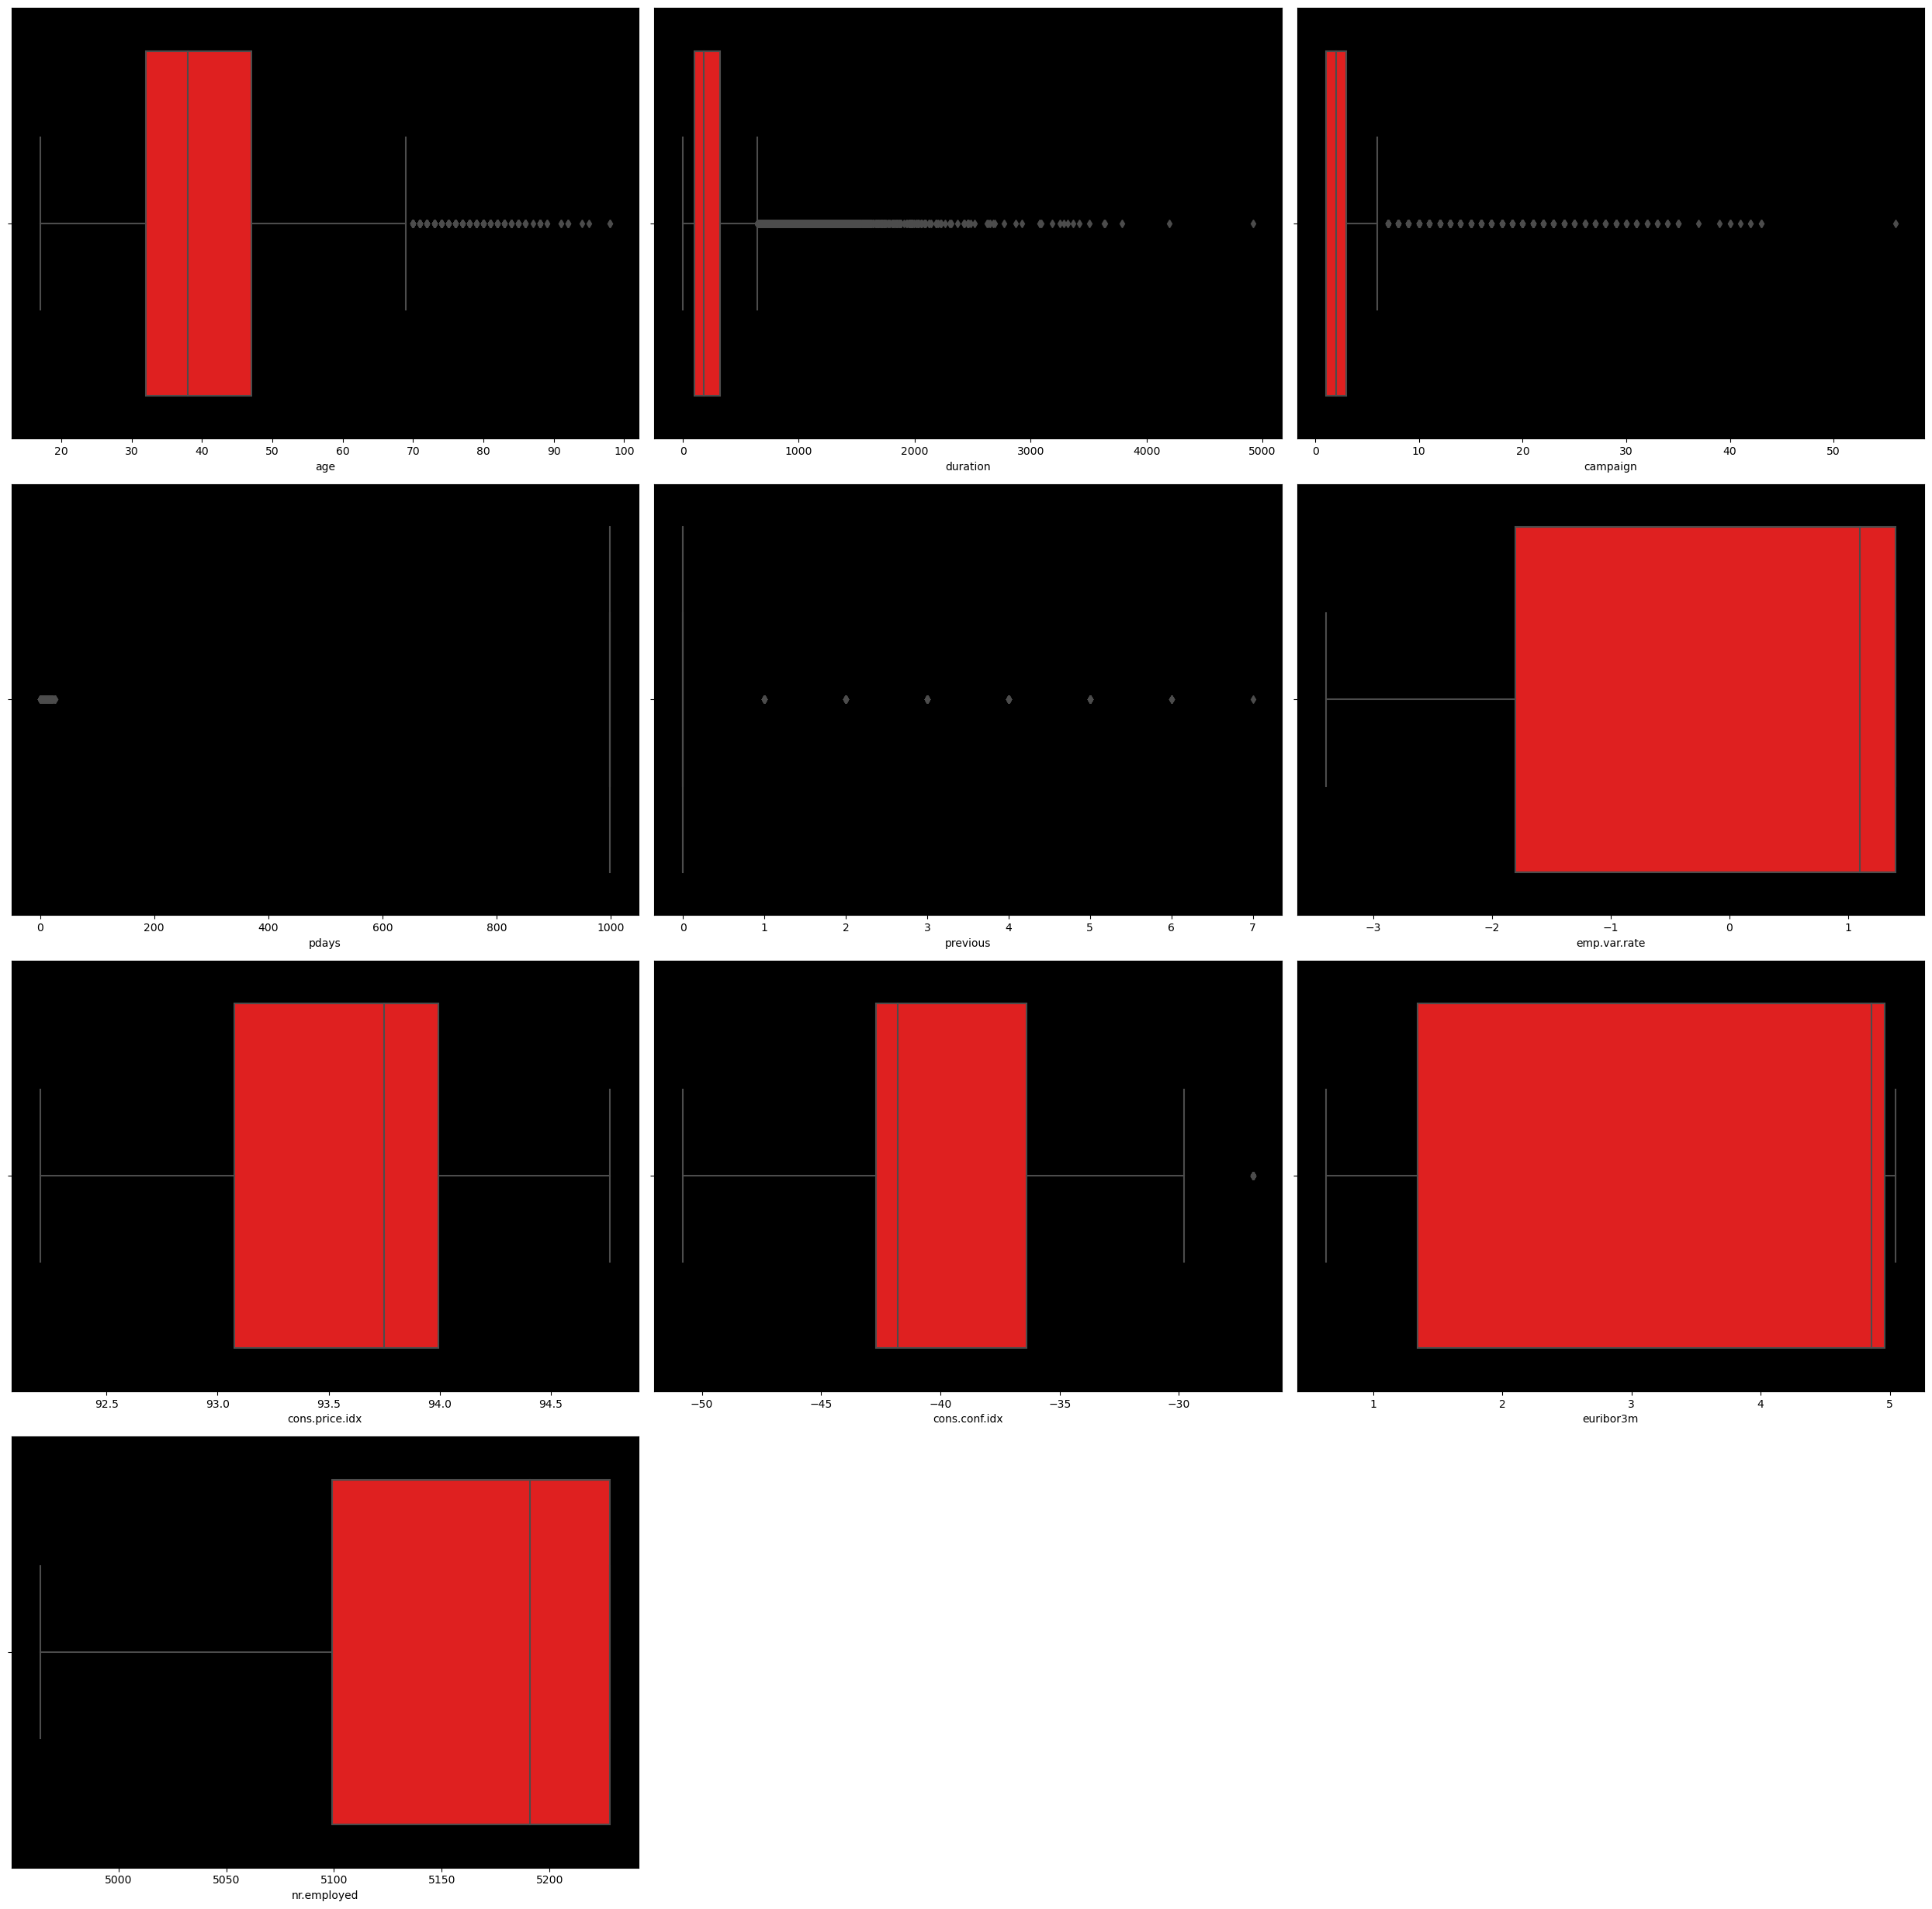

In [12]:
plt.figure(figsize=(25, 25))
for i, col in enumerate(data.drop(['y'],axis=1).select_dtypes(include=['int','float']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(4,3, i+1)
    sns.boxplot(data=data, x=col, ax=ax,color='red')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

## | Heatmap
* The heatmap plot below, we can interpret which variable is how much correlated to other variable and we can see that pdays and previous are correlated to each other to avoid multicollinearity we need to remove one variable

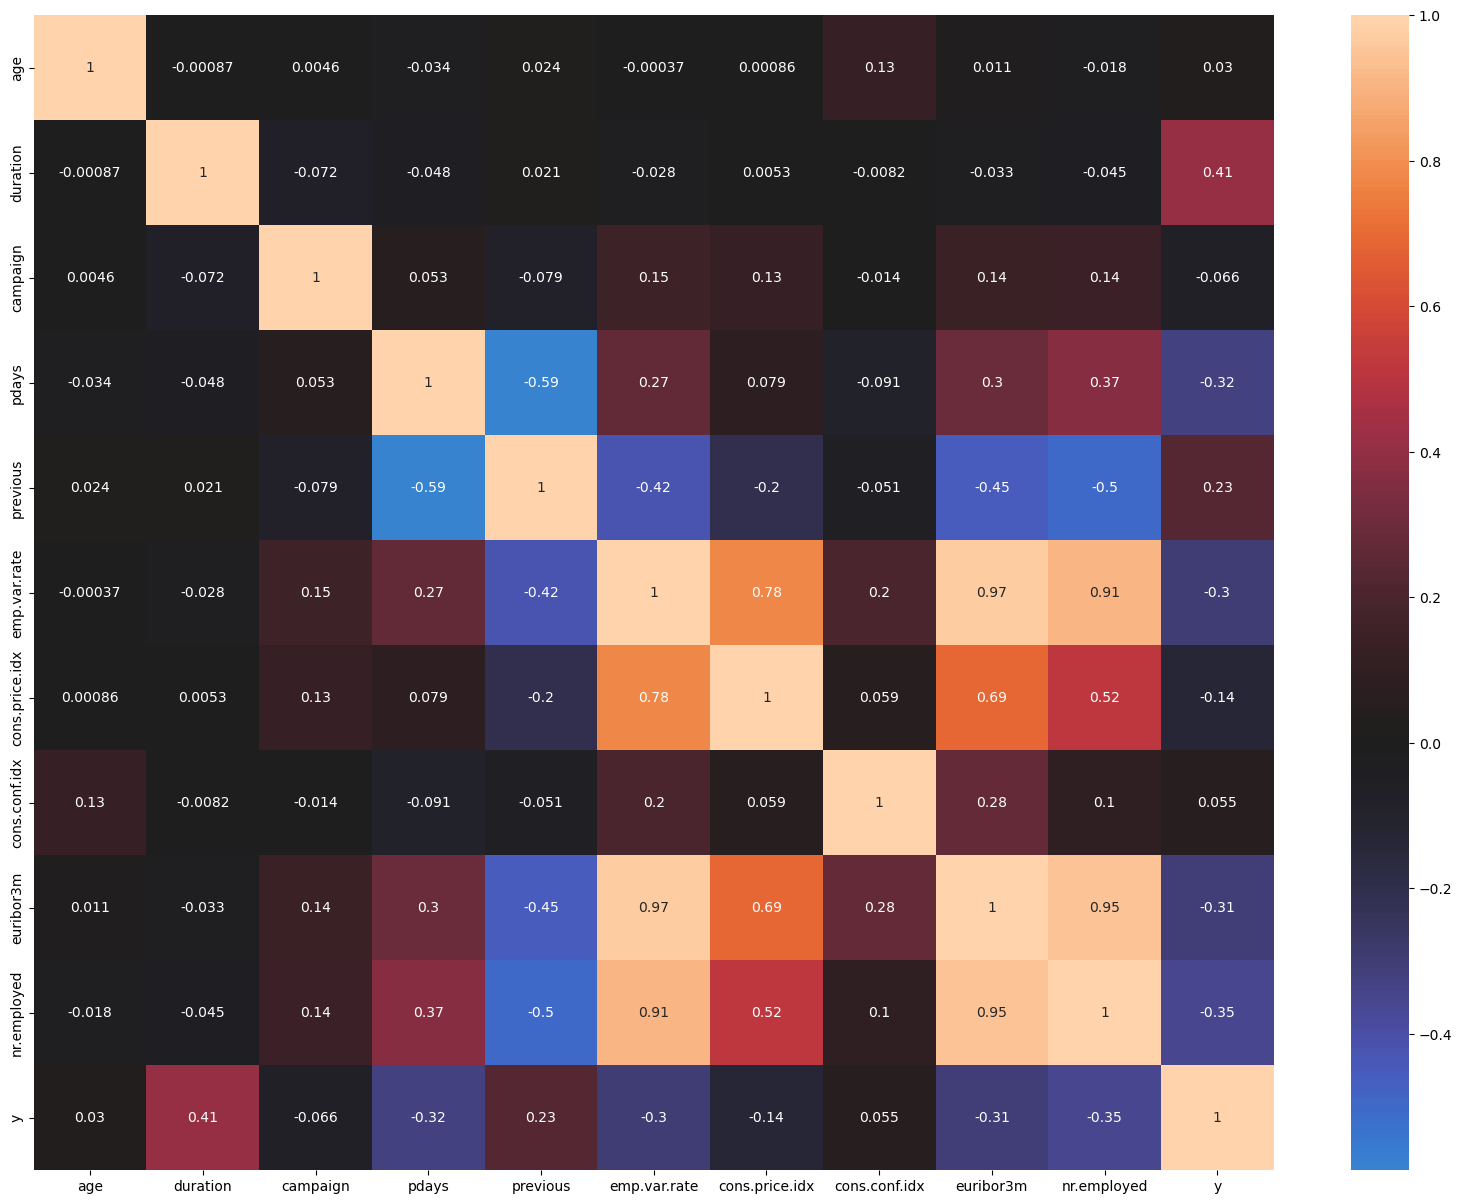

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(data.select_dtypes(include=['int','float']).corr(),annot=True,center = 0)
plt.show()

In [14]:
del data['pdays']  #removing pdays to avoid multicollinearity

## | Bar Plot

<AxesSubplot:xlabel='education', ylabel='count'>

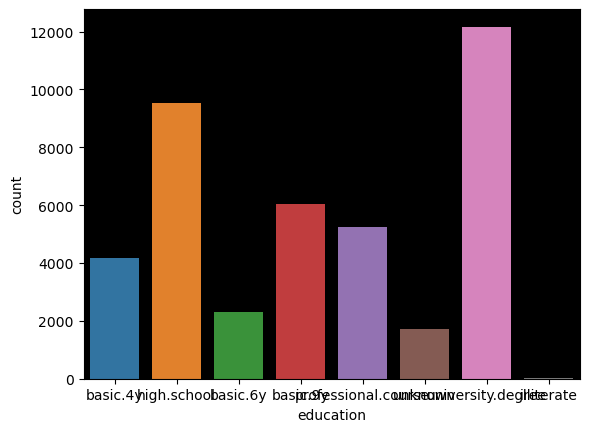

In [15]:
plt.rcParams['axes.facecolor'] = 'black'
sns.countplot(x='education',data=data)

<AxesSubplot:xlabel='contact', ylabel='count'>

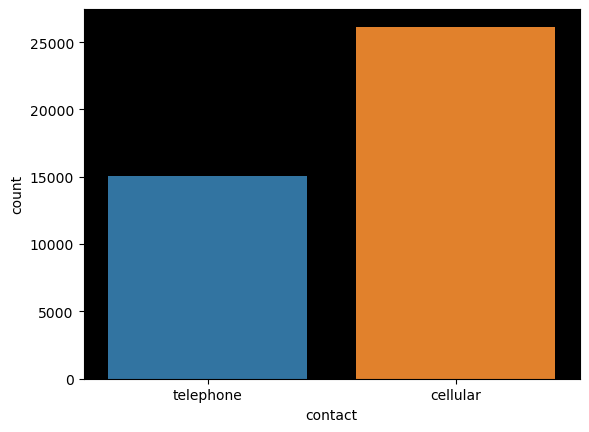

In [16]:
sns.countplot(x='contact',data=data)

<AxesSubplot:xlabel='loan', ylabel='count'>

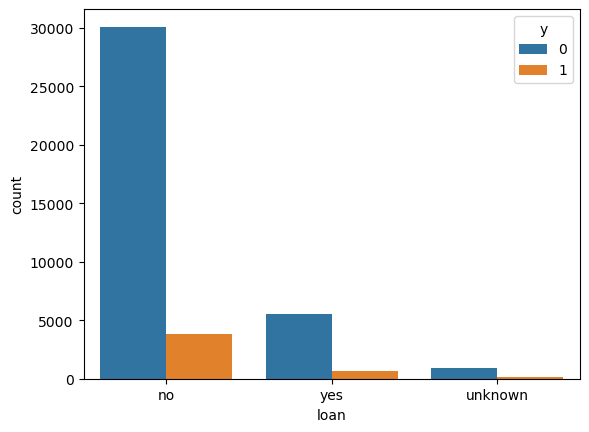

In [17]:
plt.rcParams['axes.facecolor'] = 'white'
sns.countplot(x='loan',data=data,hue='y')

<AxesSubplot:xlabel='default', ylabel='count'>

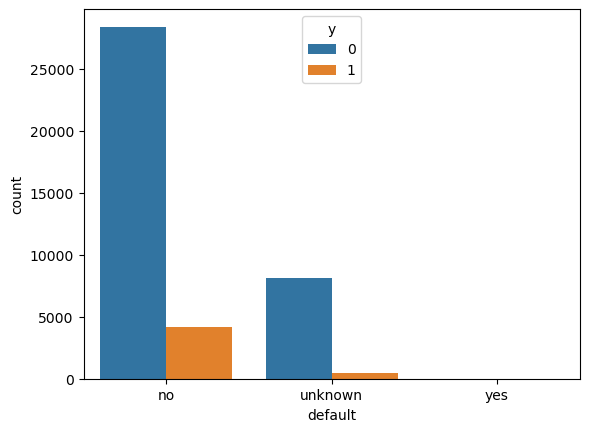

In [18]:
sns.countplot(x='default',data=data,hue='y')

<AxesSubplot:xlabel='housing', ylabel='count'>

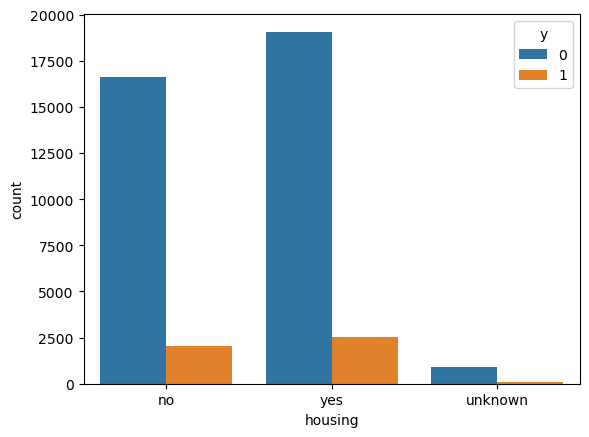

In [19]:
sns.countplot(x='housing',data=data,hue='y')

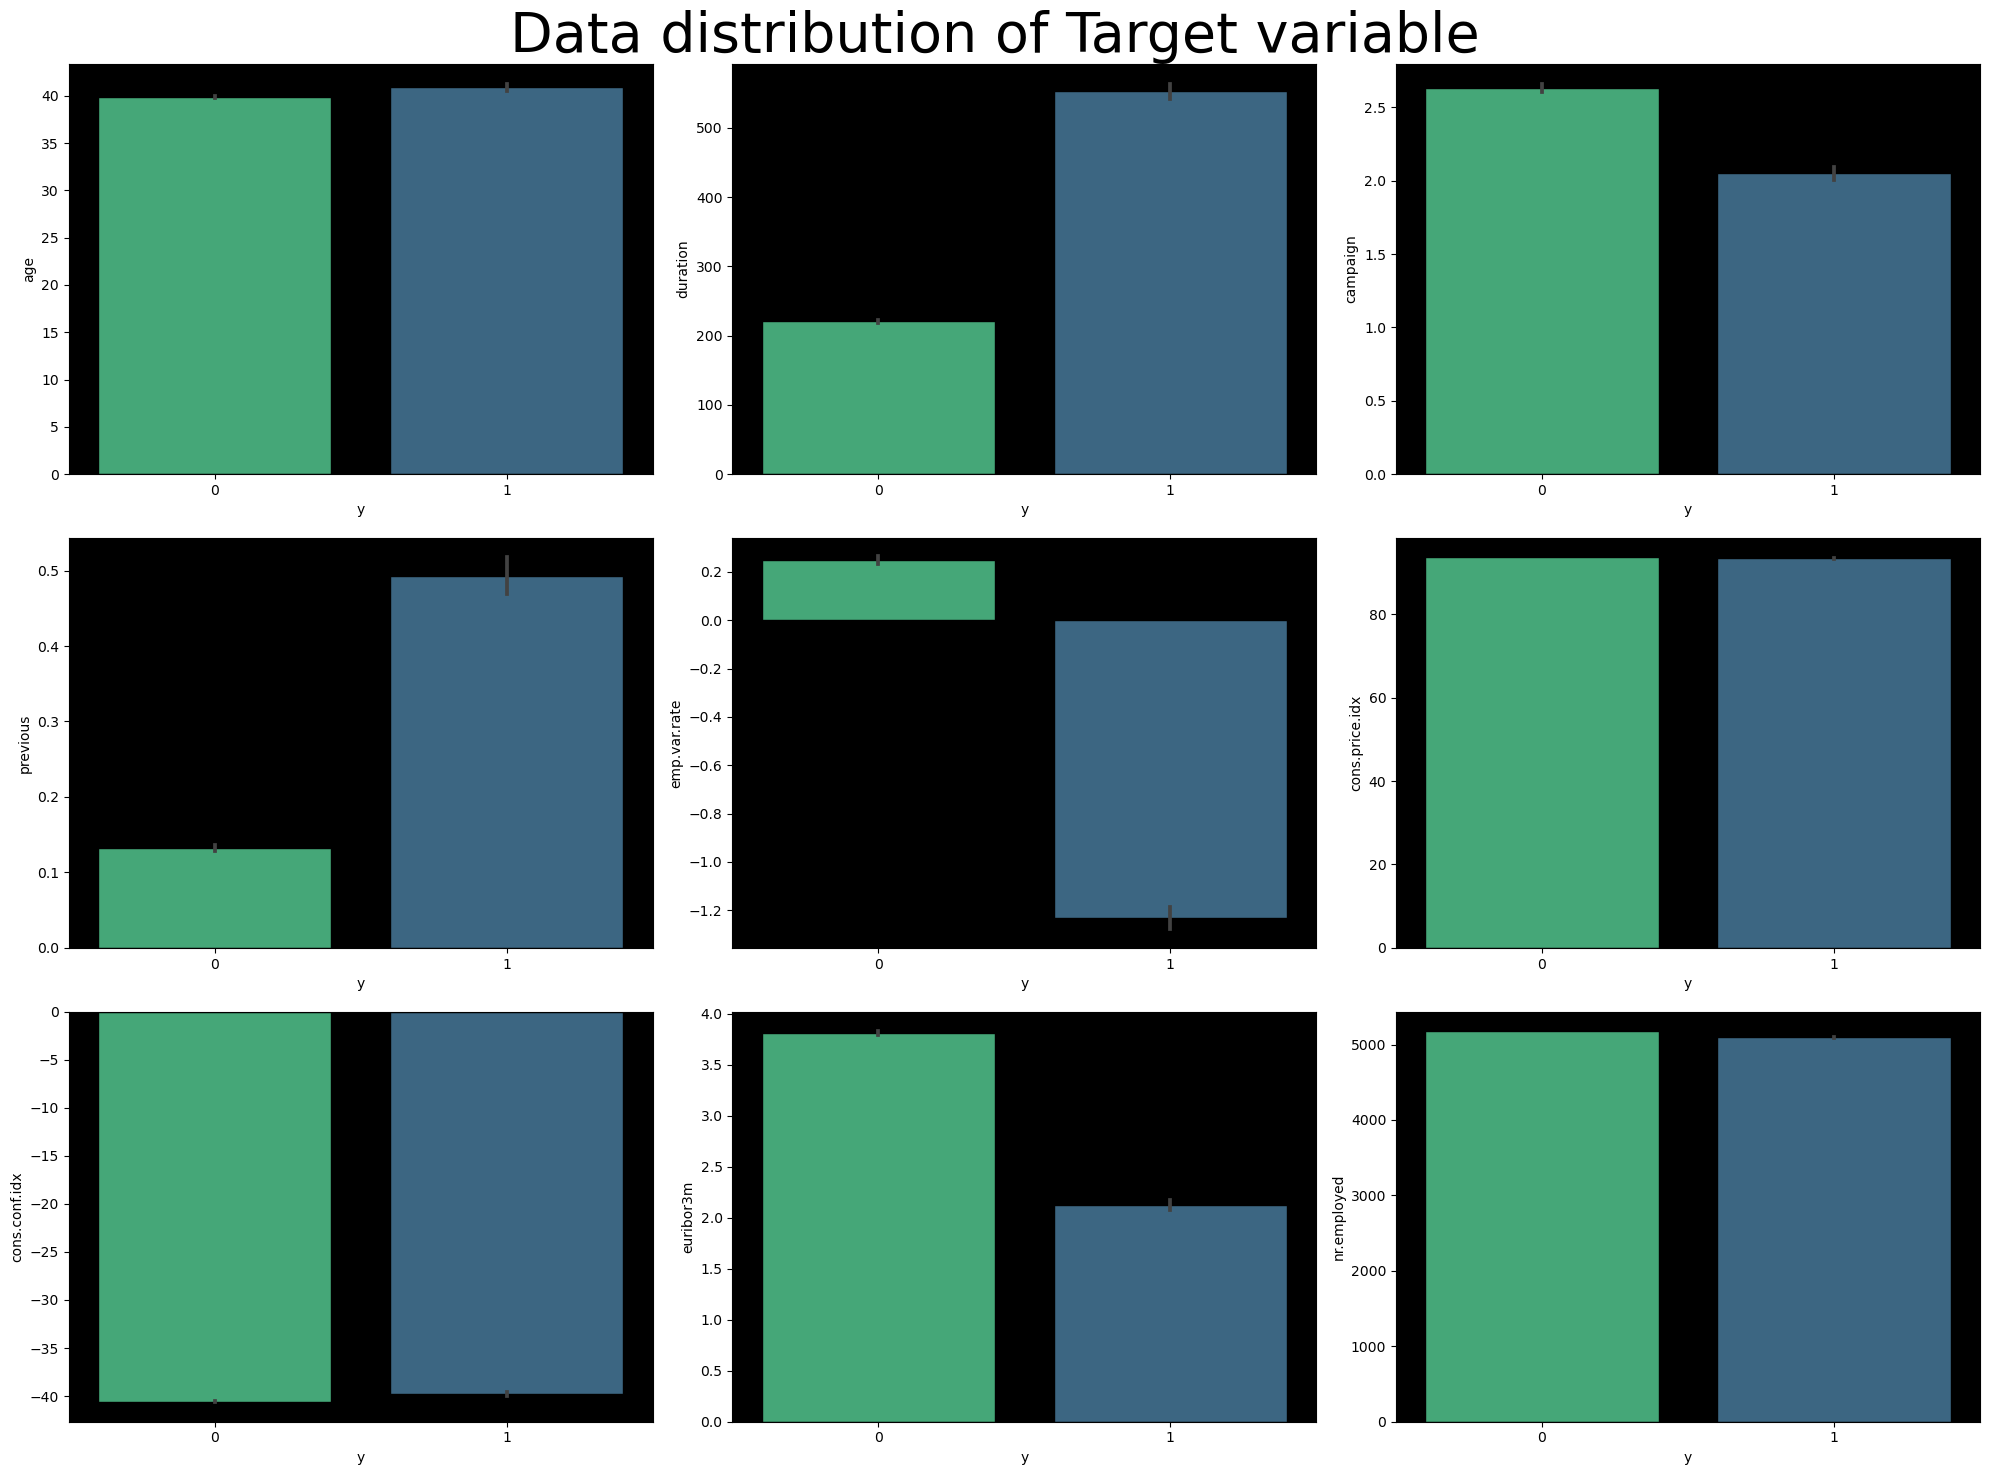

In [20]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(data.drop(['y'],axis=1).select_dtypes(include=['int','float']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(3,3, i+1)
    sns.barplot(data=data,x='y', y=col, ax=ax,edgecolor="black",palette='viridis_r') 
font= {'fontsize':25,'color': 'grey'}
plt.suptitle('Data distribution of Target variable',fontsize=40)
plt.tight_layout()

## | Analysing the target Variable
### | Pie Chart shows that the target class is Unbalanced
* Pie chart below tells us that both classes are not equal.This is a case of Unbalanced data so we will use SMOTE technique to oversample the data.

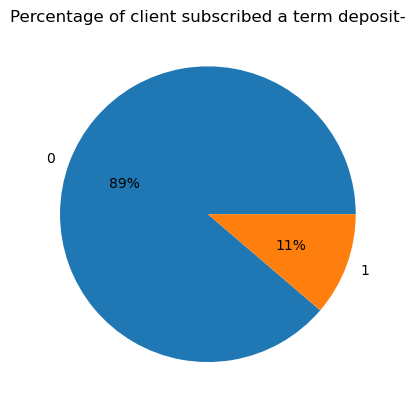

In [21]:
#1=Yes and 0=No
target_var=pd.crosstab(index=data['y'],columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index,autopct='%.0f%%')
plt.title('Percentage of client subscribed a term deposit-')
plt.show()

### | Count plot shows that the target class is imbalanced

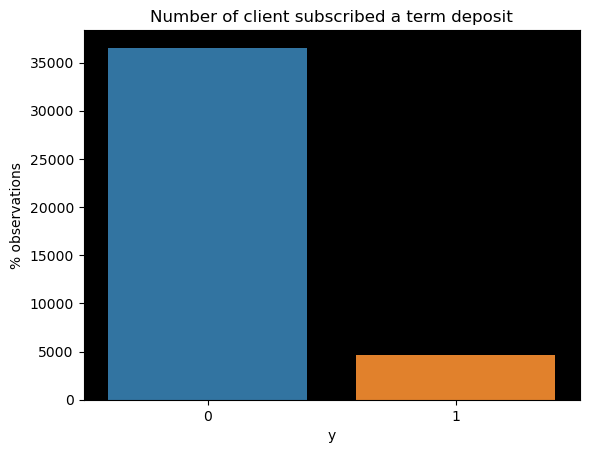

In [22]:
plt.rcParams['axes.facecolor'] = 'black'
sns.barplot(x=target_var.index,y=target_var['% observations'])
plt.title('Number of client subscribed a term deposit')
plt.show()

In [23]:
data1=pd.get_dummies(data,drop_first=True)  #applying One-Hot Encoding

In [24]:
X=data1.drop(['y'],axis=1)
y=data1['y']

In [25]:
X.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0


# 3 | Feature Selection

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(X.values, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X.values)

# 4 | Splitting our dataset into train and test set

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,stratify=y,random_state=0)

# 5 | SMOTE(Synthetic Minority Oversampling Technique)
* Synthetic Minority Oversampling Technique or SMOTE is a technique to oversample the minority class. Simply adding duplicate records of minority class often don’t add any new information to the model. In SMOTE new instances are synthesized from the existing data

In [28]:
!pip install imblearn

## | Count plot after applying SMOTE

C:\Users\Charu Gupta\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


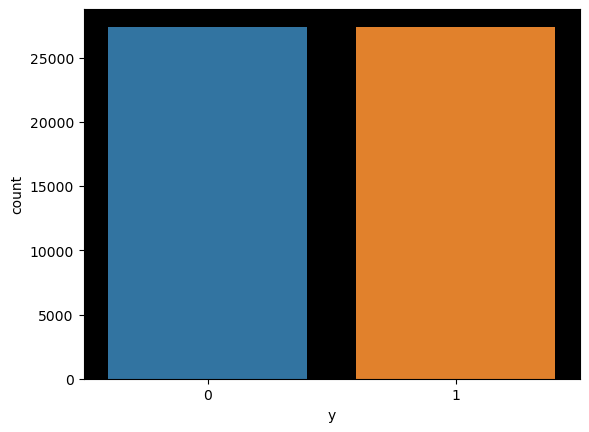

In [29]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto', random_state=42)
X_train,y_train=sm.fit_resample(X_train,y_train)


sns.countplot(y_train)
plt.show()

# 6 | Feature Scaling
* Standardization is  scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# 7 | Modeling (Decision Tree Classifier)
### | K-fold Cross validation
* Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set
### | Confusion Matrix

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import classification_report

In [32]:
model_comparison={}
classifier=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5,scoring="recall")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Decision Tree']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 88.45%
Model F1-Score : 88.19%
Cross Val Accuracy: 91.00 %
Cross Val Standard Deviation: 13.76 %
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      9006
           1       0.54      0.49      0.51      1291

    accuracy                           0.88     10297
   macro avg       0.74      0.72      0.72     10297
weighted avg       0.88      0.88      0.88     10297



In [33]:
Model_com_data=pd.DataFrame(model_comparison).T
Model_com_data.columns=['Model Accuracy','Model F1-Score','CV Accuracy','CV std']
Model_com_data=Model_com_data.sort_values(by='Model F1-Score',ascending=False)
Model_com_data.style.format("{:.2%}").background_gradient(cmap='Blues')

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
Decision Tree,88.45%,88.19%,91.00%,13.76%


In [34]:
cf_matrix=confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix:\n\n{cf_matrix}")

Confusion Matrix:

[[8477  660]
 [ 529  631]]


## | Confusion Matrix Plot

[Text(0.5, 14.722222222222216, 'Predicted Label'),
 Text(45.722222222222214, 0.5, 'Actual Label')]

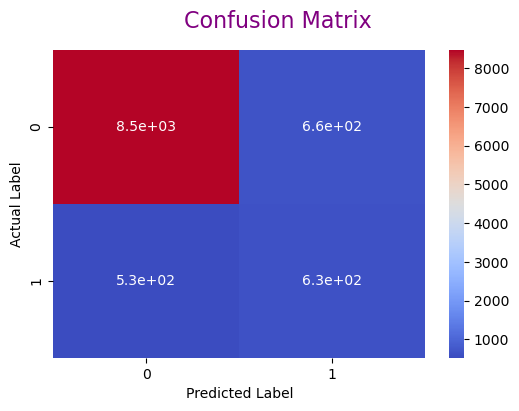

In [35]:
fig,ax=plt.subplots(figsize=(6,4))
sns.heatmap(cf_matrix,annot=True,cmap='coolwarm')
fig.suptitle(t="Confusion Matrix",color="purple",fontsize=16)
ax.set(xlabel="Predicted Label",ylabel="Actual Label")

In [36]:
print(f"Accuracy Score:\n\n{accuracy_score(y_test,y_pred)*100:.2f}%")

Accuracy Score:

88.45%


## | Saving the model

In [37]:
import pickle
pickle.dump(clf,open("decisiontreeclassifier.pkl","wb")) # dump()saves our trained model in same directory of this file